# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


/Users/mundyreimer/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print(df.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [17]:
# frequency table for prestige and whether or not someone was admitted
print(pd.crosstab(df['prestige'], df['prestige'], rownames=['admit']))

prestige  1.0  2.0  3.0  4.0
admit                       
1.0        61    0    0    0
2.0         0  148    0    0
3.0         0    0  121    0
4.0         0    0    0   67


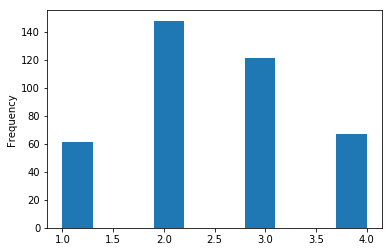

In [22]:
df['prestige'].plot.hist()

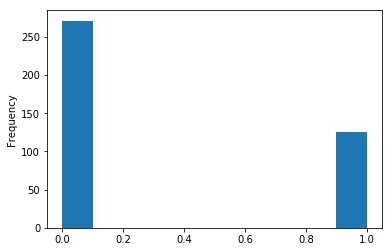

In [21]:
df['admit'].plot.hist()

## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [25]:
dummy_vars = pd.get_dummies(df['prestige'], prefix='prestige')
print(dummy_vars.head())

   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0             0             0             1             0
1             0             0             1             0
2             1             0             0             0
3             0             0             0             1
4             0             0             0             1


#### 2.2 When modeling our class variables, how many do we need? 



Answer: In the modeling phase, we need in general n-1, or in this instance 3 class/dummy variables. The last dummy variable will become our reference.

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [28]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_vars.ix[:, 'prestige_1':])
# I'm assuming "dummy_ranks" is suppose to be my "dummy_vars"???
print(handCalc.head())

   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             0             1             0
1      1  660.0  3.67             0             0             1             0
2      1  800.0  4.00             1             0             0             0
3      1  640.0  3.19             0             0             0             1
4      0  520.0  2.93             0             0             0             1


/Users/mundyreimer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [211]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted
cols_to_keep = ['gre', 'gpa']
cut_freq_table = df[cols_to_keep].join(dummy_vars.ix[:,'prestige_2.0':])
print(cut_freq_table.head())

# explicitly specifying and adding our constant/intercept
cut_freq_table['intercept'] = 1.0
#dummy_vars['intercept'] = 1.0

     gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0  intercept
0  380.0  3.61           0.0           1.0           0.0        1.0
1  660.0  3.67           0.0           1.0           0.0        1.0
2  800.0  4.00           0.0           0.0           0.0        1.0
3  640.0  3.19           0.0           0.0           1.0        1.0
4  520.0  2.93           0.0           0.0           1.0        1.0


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [221]:
#building the training set 
y = df['admit']

#print(y)
#X = df['prestige']

#print(cut_freq_table[:])
#print(dummy_vars.ix[:,'prestige_2.0':].head())
X = dummy_vars.ix[:397,'prestige_2.0':]

#training the model 
lin_model = sm.OLS(y,m)

#fitting the model
results = lin_model.fit()

#printing results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  admit   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     8.899
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           1.02e-05
Time:                        15:17:26   Log-Likelihood:                -246.67
No. Observations:                 397   AIC:                             501.3
Df Residuals:                     393   BIC:                             517.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
prestige_2.0    -0.1829      0.069     -2.655   

#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [222]:
print(results.conf_int())

                     0         1
prestige_2.0 -0.318292 -0.047459
prestige_3.0 -0.449336 -0.169822
prestige_4.0 -0.519385 -0.204373
intercept     0.427029  0.654938


#### 3.3 Calculate the odds ratio

In [223]:
print(np.exp(results.params))

prestige_2.0    0.832872
prestige_3.0    0.733756
prestige_4.0    0.696367
intercept       1.717696
dtype: float64


#### 3.4 Write this finding in a sentenance: 

Answer: We took the exponential of each coefficient to generate the odds ratio.  The odds ratio tells us how 1 unit increase or decrease in a variable changes the odds of admittion.  For instance, from above we can see that if the prestige of the school is 2 then the odds of admition will increase by 83%.

#### 3.5 Print the cross tab for prestige_4

In [225]:
print(pd.crosstab(results['prestige_4.0'], rownames=['admit']))

TypeError: 'RegressionResultsWrapper' object is not subscriptable

#### 3.6 Calculate the OR 

In [227]:
params = results.params
conf = results.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

                  2.5%     97.5%        OR
prestige_2.0  0.727390  0.953650  0.832872
prestige_3.0  0.638052  0.843815  0.733756
prestige_4.0  0.594886  0.815158  0.696367
intercept     1.532698  1.925023  1.717696


#### 3.7 Write this finding in a sentence

Answer: The above tells us that at the various confidence intervals (2.5% & 97.5%) for each respective prestige level, we can expect the odds ratio to differ.  This informs us how our uncertainty in that prestige level can impact the odds ratio (admissions rate).

## Part 4. Analysis

In [230]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_vars.ix[:, 'prestige_2.0':])
print(data.head())

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0  intercept
0      0  380.0  3.61           0.0           1.0           0.0        1.0
1      1  660.0  3.67           0.0           1.0           0.0        1.0
2      1  800.0  4.00           0.0           0.0           0.0        1.0
3      1  640.0  3.19           0.0           0.0           1.0        1.0
4      0  520.0  2.93           0.0           0.0           1.0        1.0


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [231]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [232]:
train_cols = data.columns[1:]

#### 4.2 Fit the model

In [233]:
logit = sm.Logit(data['admit'], data[train_cols])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [234]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Mon, 27 Nov 2017   Pseudo R-squ.:                 0.08166
Time:                        15:27:52   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043    7.44e-05       0.004
gpa              0.7793      0.333      2.344      0.019       0.128       1.431
prestige_2.0    -0.6801      0.317     -2.14

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [238]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['5.0%', '95.0%', 'OR']
print(np.exp(conf))

                  5.0%     95.0%        OR
gre           1.000074  1.004372  1.002221
gpa           1.136120  4.183113  2.180027
prestige_2.0  0.272168  0.942767  0.506548
prestige_3.0  0.133377  0.515419  0.262192
prestige_4.0  0.093329  0.479411  0.211525
intercept     0.002207  0.194440  0.020716


#### 4.5 Interpret the OR of Prestige_2

Answer: The odds of being admitted are 50% if the prestige of the school is 2.

#### 4.6 Interpret the OR of GPA

Answer: The odds of being admitted are 2:1 if the GPA is within that 95% CI

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [240]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [241]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print(gres)
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print(gpas)
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


TypeError: slice indices must be integers or None or have an __index__ method

In [ ]:
# I am confused as to how to fix the above error ^

#### 5.1 Recreate the dummy variables

In [ ]:
# recreate the dummy variables

# keep only what we need for making predictions


#### 5.2 Make predictions on the enumerated dataset

#### 5.3 Interpret findings for the last 4 observations

Answer: 

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.